# Hello world

In [1]:
import tensorflow as tf

hello = tf.constant("Hello, world!") #상수 노드를 만든다.

#세션 객체를 만들고
with tf.Session() as session: #Python with as 구문. 
    print(session.run(hello)) #세션을 실행
    #출력은 b'Hello, world!' : 여기서 b 는 byte literals의 약자이다.

b'Hello, world!'


# TensorFlow Machine

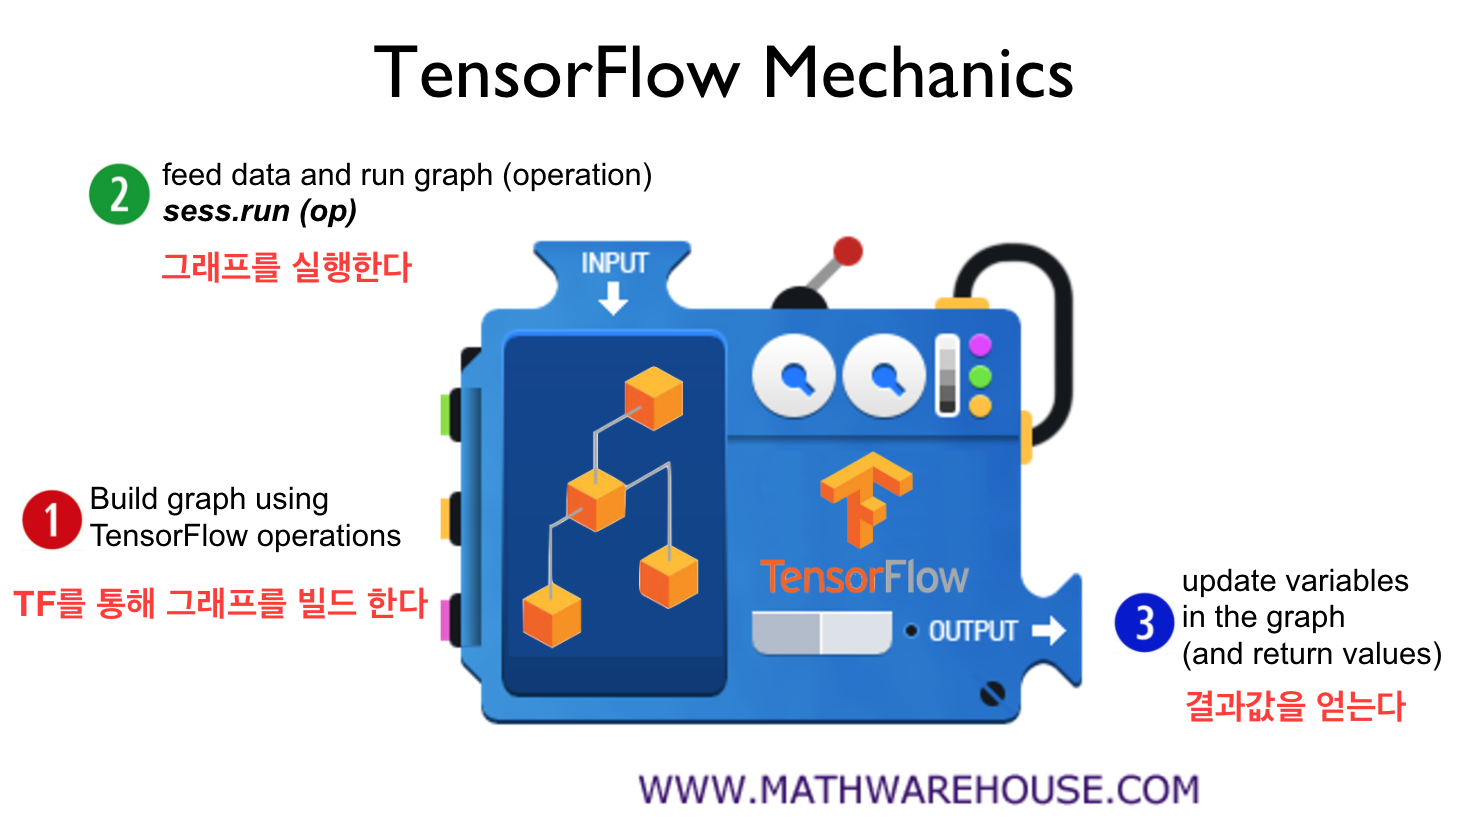

# Computational Graph
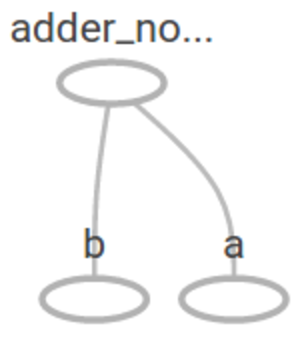

1 Build graph using TensorFlow operations

In [2]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) #tf.float32 기본 소수
node3 = tf.add(node1, node2) # node3 = node1 + node2

In [3]:
print("node1 : ", node1)
print("node2 : ", node2)
print("node3 : ", node3)
#출력을 하면 값이 나오는 것이 아니라 노드의 정보값이 나온다. 값을 출력하려면 세션을 실행시켜야 한다. 
#Session run을 통해서 결과값을 얻는다.

node1 :  Tensor("Const_1:0", shape=(), dtype=float32)
node2 :  Tensor("Const_2:0", shape=(), dtype=float32)
node3 :  Tensor("Add:0", shape=(), dtype=float32)


2 feed data and run graph (operation) sess.run (op) 

3 update variables in the graph (and return values) 

In [4]:
with tf.Session() as session:
    print("session.run(node1, node2) : ", session.run([node1, node2]))
    print("session.run(node3) : ", session.run(node3))
    #값을 출력하려면 세션을 실행시켜야 한다.

session.run(node1, node2) :  [3.0, 4.0]
session.run(node3) :  7.0


# Placeholder

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b #tf.add(a, b)와 같다. 단축형
#모델 입력 시 변경되지 않을 데이터를 입력하고자 할 때는 placeholder를 사용하면 된다.
#상수(constant)처럼 바로 값을 입력할 수 없다.
#tf.placeholder()는 tf.session.run() 함수에 전달 된 데이터에서 값을 가져 오는 텐서를 반환하므로 세션이 실행되기 전에 입력을 바로 설정할 수 있다.
#자료형 뒤에 shape를 지정해 줄 수 도 있다. https://www.tensorflow.org/api_docs/python/tf/placeholder

#tf.placeholder()는 입력 데이터를 만들 때 주로 사용한다. (실제 훈련 예제를 제공하는 변수) - 초기값을 지정할 필요 없다. (모델 입력시 변경되지 않을 데이터)
#tf.Variable()은 데이터의 상태를 저장할 때 주로 사용한다. (가중치나 편향 등의 학습 가능한 변수) - 초기값을 지정해야 한다. (학습 되는 데이터)
#http://stackoverflow.com/questions/36693740/whats-the-difference-between-tf-placeholder-and-tf-variable

with tf.Session() as session:
    print(session.run(adder_node, feed_dict={a: 3, b: 4.5})) #값을 넘겨주면서 그래프 실행
    print(session.run(adder_node, feed_dict={a: [1, 3], b: [2, 4]})) #배열로 여러 값을 넘겨줄 수 있다.
    #run()에서 feed_dict 매개 변수를 사용해서 텐서를 설정해 준다.
    #(변수 텐서(placeholder), feed_dict = 매개변수 설정(딕셔너리))

7.5
[ 3.  7.]


# Tensor Ranks, Shapes, and Types

Rank :: 차원
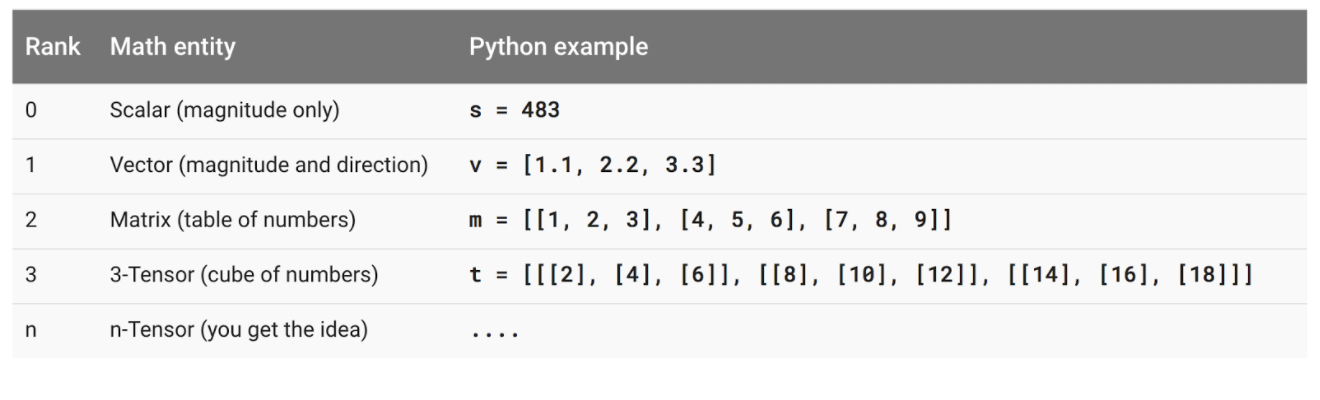

Shape :: 텐서의 모양 ex)[[1, 2, 3], [4, 5, 6], [7, 8, 9]] :: (3, 3)shape
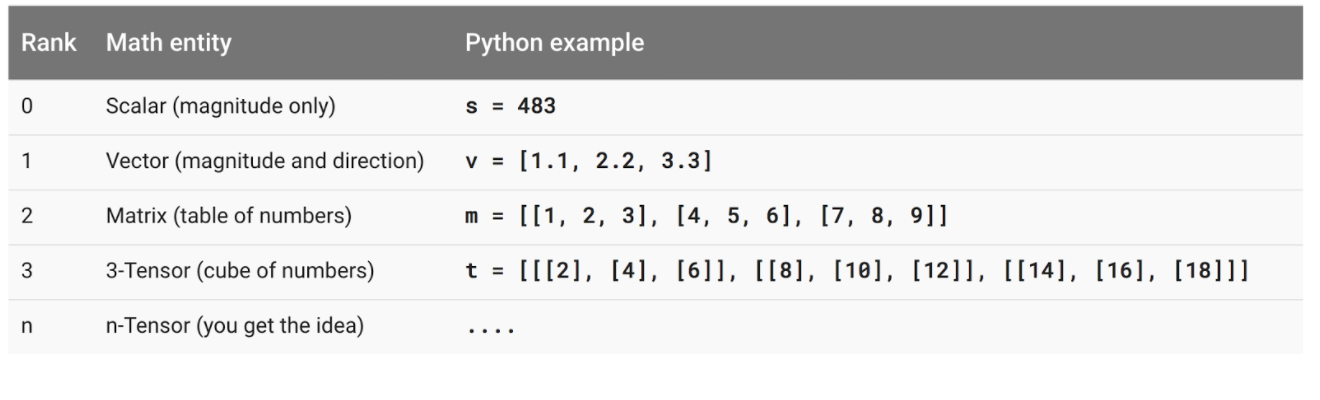

Type :: 데이터의 타입
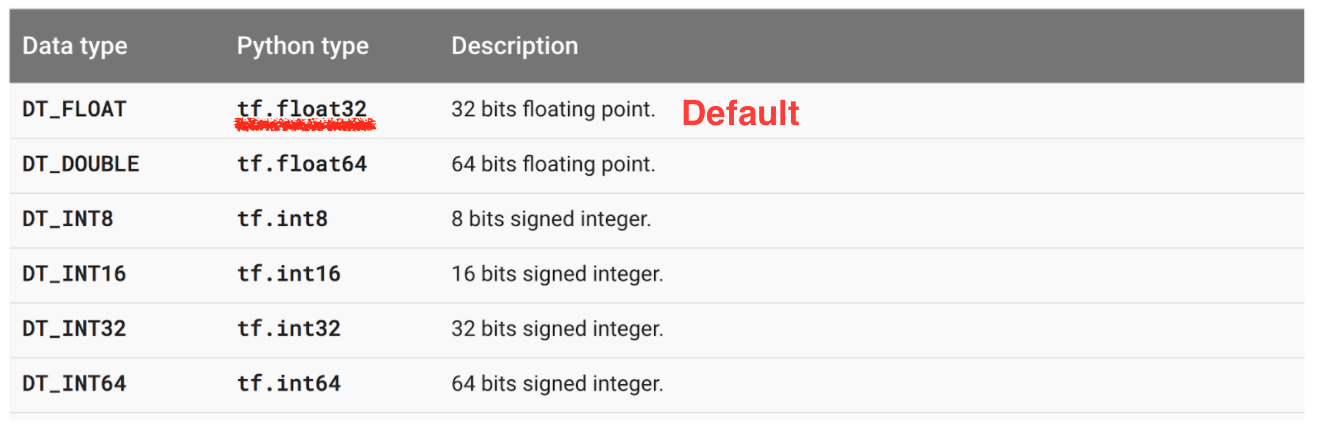

In [6]:
3 # a rank 0 tensor; this is a scalar with shape []
[1. ,2., 3.] # a rank 1 tensor; this is a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]